In [3]:
# install.packages("plotrix")
# install.packages("mice")
# install.packages("VIM")
# install.packages("lattice") 
# install.packages("tidyr")

library(plotrix)
library(mice)
library(VIM)
library(lattice)
library(tidyr)

Warning message:
"package 'plotrix' was built under R version 3.6.3"Warning message:
"package 'mice' was built under R version 3.6.3"
Attaching package: 'mice'

The following object is masked from 'package:stats':

    filter

The following objects are masked from 'package:base':

    cbind, rbind

Warning message:
"package 'VIM' was built under R version 3.6.3"Loading required package: colorspace
Loading required package: grid
Loading required package: data.table
VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: 'VIM'

The following object is masked from 'package:datasets':

    sleep

Warning message:
"package 'lattice' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"

In [1]:
setwd("D://R-4.0.2//ExcelWorks")
df1 <- read.csv(file = "UNS1.csv", header = F, stringsAsFactors=FALSE)
df2 <- read.csv(file = "UNS2.csv", header = F, stringsAsFactors=FALSE)
df3 <- read.csv(file = "UNS3.csv", header = F, stringsAsFactors=FALSE)
df4 <- read.csv(file = "UNS4.csv", header = F, stringsAsFactors=FALSE)

In [2]:
df<- base::rbind(df1,df2,df3,df4)

In [4]:
colnames(df) <- c('source_ip', 'source_port', 'dest_ip', 'dest_port', 'proto', 'state', 'duration', 'source_bytes', 'dest_bytes', 'source_ttl',
'dest_ttl', 'source_loss', 'dest_loss', 'service', 'source_load', 'dest_load', 'source_pkts', 'dest_pkts', 'source_TP_win', 'dest_TP_win', 
'source_tcp_bn', 'dest_tcp_bn', 'source_mean_sz', 'dest_mean_sz', 'trans_depth', 'res_bdy_len', 'source_jitter', 'dest_jitter', 'start_time',
'last_time', 'source_int_pk_time', 'dest_int_pk_time', 'tcp_rtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'count_state_ttl', 
'count_flw_http_mthd', 'is_ftp_login', 'count_ftp_cmd', 'count_srv_source', 'count_srv_dest', 'count_dest_ltm',
'count_source_ltm', 'count_source_destport_ltm', 'count_dest_sourceport_ltm', 'counts_dest_source_ltm', 'attack_cat', 'Label')
head(df)


source_ip,source_port,dest_ip,dest_port,proto,state,duration,source_bytes,dest_bytes,source_ttl,...,count_ftp_cmd,count_srv_source,count_srv_dest,count_dest_ltm,count_source_ltm,count_source_destport_ltm,count_dest_sourceport_ltm,counts_dest_source_ltm,attack_cat,Label
ï»¿59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,,0
59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,,0
59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,,0
59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,,0
59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,,0
59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,,0


In [5]:
table(df$attack_cat) # This exhibits a couple of problems, most notable
		     # the NULL ones


                          Fuzzers         Fuzzers   Reconnaissance  
         2218764             5051            19195            12228 
      Shellcode          Analysis         Backdoor        Backdoors 
            1288             2677             1795              534 
             DoS         Exploits          Generic   Reconnaissance 
           16353            44525           215481             1759 
       Shellcode            Worms 
             223              174 

In [9]:
t <- table(df$attack_cat, exclude = "")
t[1] <- t[1] + t[2]
t[2]
t <- t[-1]
t[6] <- t[5] + t[6]
t[6]
t<- t[-5]
t

Fuzzers  
    19195

Backdoors 
     2329


        Fuzzers   Reconnaissance        Shellcode          Analysis 
           19195            12228             1288             2677 
       Backdoors              DoS         Exploits          Generic 
            2329            16353            44525           215481 
  Reconnaissance        Shellcode            Worms 
            1759              223              174 

In [10]:
t[3]<- t[3]+ t[10]
t[3]
t <- t[-10]
t[2]<- t[2]+t[9]
t[2]
t<- t[-9]
t

Shellcode  
       1511

Reconnaissance  
           13987


        Fuzzers   Reconnaissance        Shellcode          Analysis 
           19195            13987             1511             2677 
       Backdoors              DoS         Exploits          Generic 
            2329            16353            44525           215481 
           Worms 
             174 

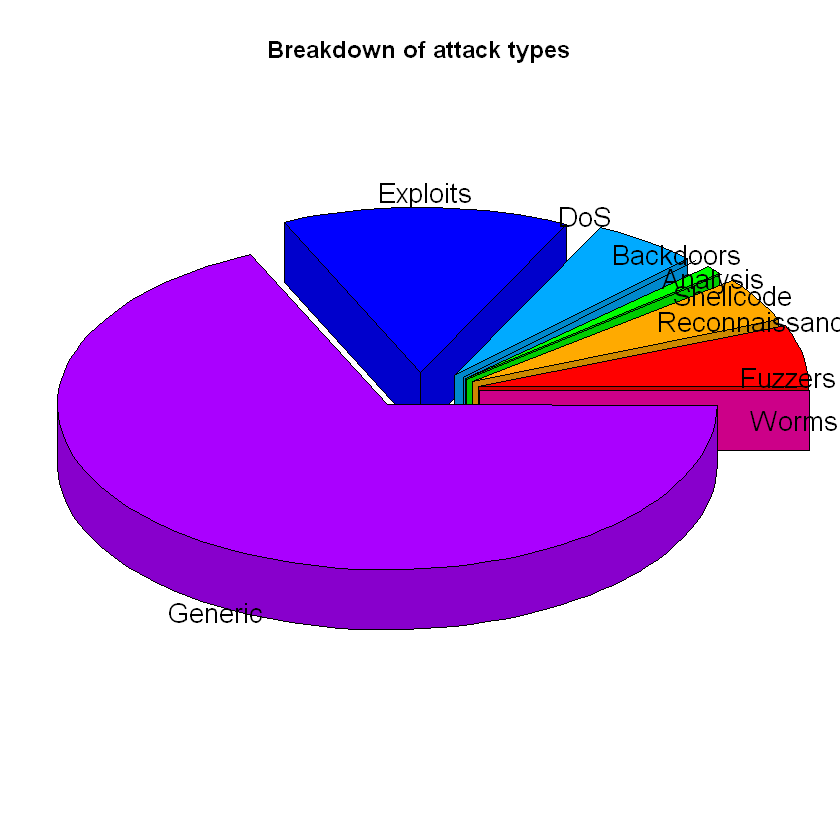

In [11]:
pie3D(t, labels = names(t), explode = 0.2, theta = pi/4,
labelcex= 1.35, radius = 1.1, main = "Breakdown of attack types")

In [12]:
## First row has been corrupted by our binding for some reason:
df<- df[-1,]

In [13]:
table(df$source_ip)


    10.40.170.2     10.40.182.1     10.40.182.3     10.40.182.6      10.40.85.1 
           2094            3984            2105            3492            4018 
    10.40.85.10     10.40.85.30       127.0.0.1   149.171.126.0   149.171.126.1 
            793            2138               1             261             311 
 149.171.126.10  149.171.126.11  149.171.126.12  149.171.126.13  149.171.126.14 
          30365              28           16082             218           41047 
 149.171.126.15  149.171.126.16  149.171.126.17  149.171.126.18  149.171.126.19 
          44883               9              22           81680              21 
  149.171.126.2   149.171.126.3   149.171.126.4   149.171.126.5   149.171.126.6 
            295             311             300             339             298 
  149.171.126.7   149.171.126.8   149.171.126.9    175.45.176.0    175.45.176.1 
            270             291             285           82999          127998 
   175.45.176.2    175.45.1

In [14]:
# What's the unique IP case?
print(df[df$source_ip=="127.0.0.1",])

       source_ip source_port   dest_ip dest_port proto state duration
500014 127.0.0.1       52129 127.0.0.1        25   tcp   RST  1.1e-05
       source_bytes dest_bytes source_ttl dest_ttl source_loss dest_loss
500014           60         40         64       64           0         0
       service source_load dest_load source_pkts dest_pkts source_TP_win
500014       -           0         0           1         1           255
       dest_TP_win source_tcp_bn dest_tcp_bn source_mean_sz dest_mean_sz
500014           0    2627775599           0             60           40
       trans_depth res_bdy_len source_jitter dest_jitter start_time  last_time
500014           0           0             0           0 1421946164 1421946164
       source_int_pk_time dest_int_pk_time tcp_rtt synack ackdat
500014                  0                0       0      0      0
       is_sm_ips_ports count_state_ttl count_flw_http_mthd is_ftp_login
500014               0               0                   0    

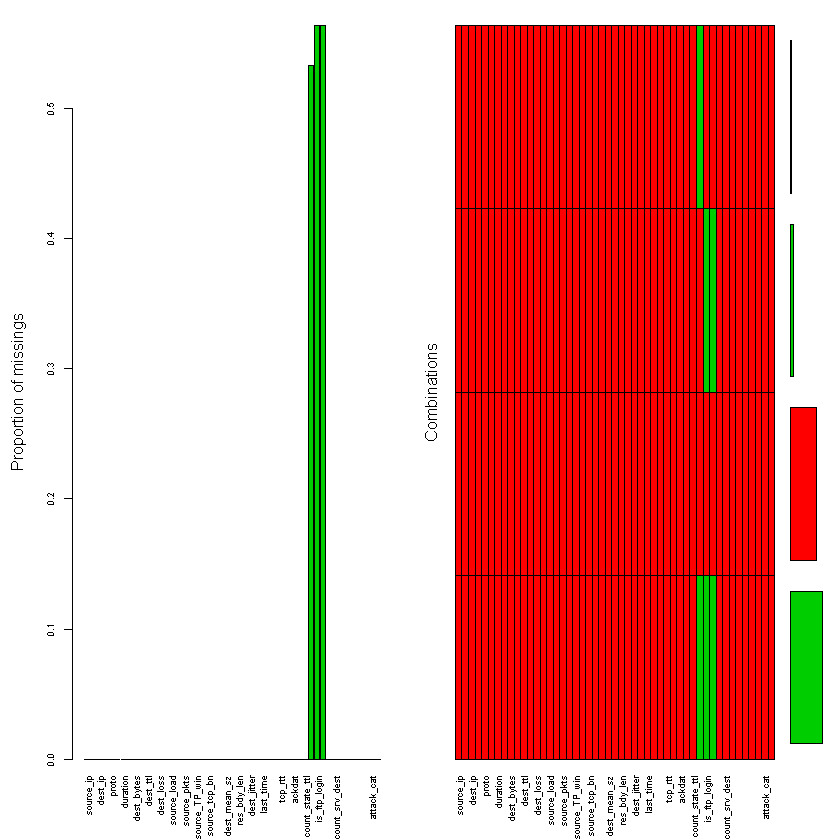

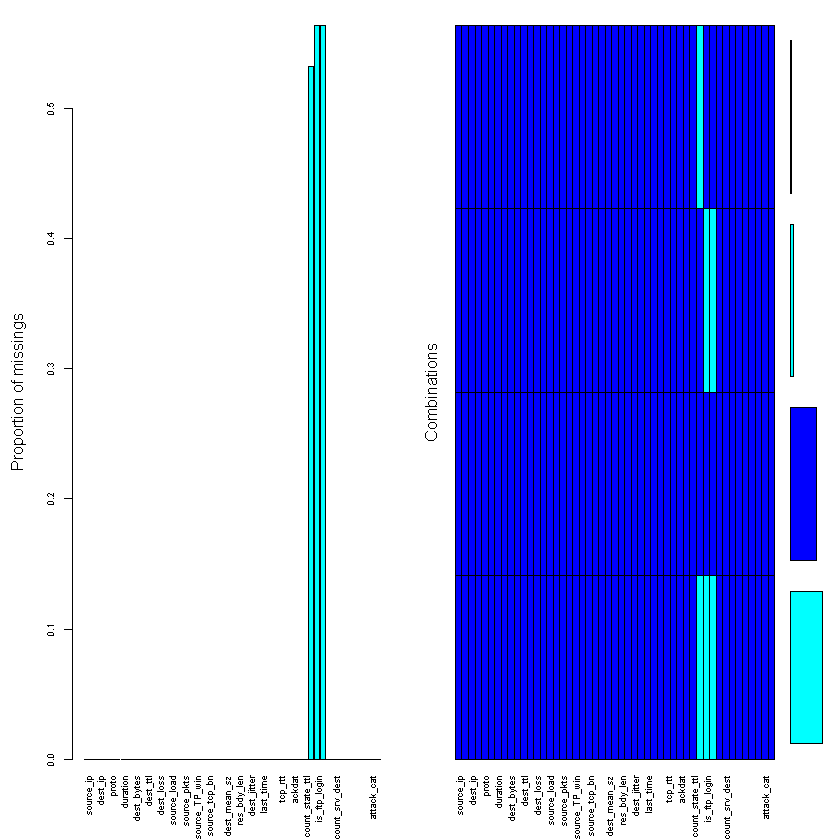

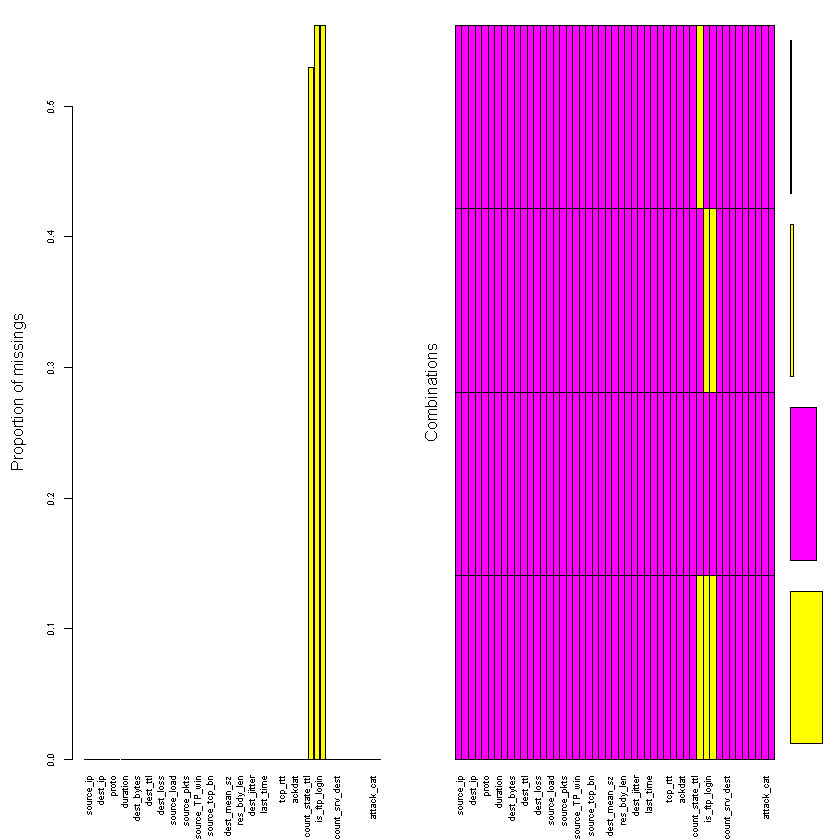

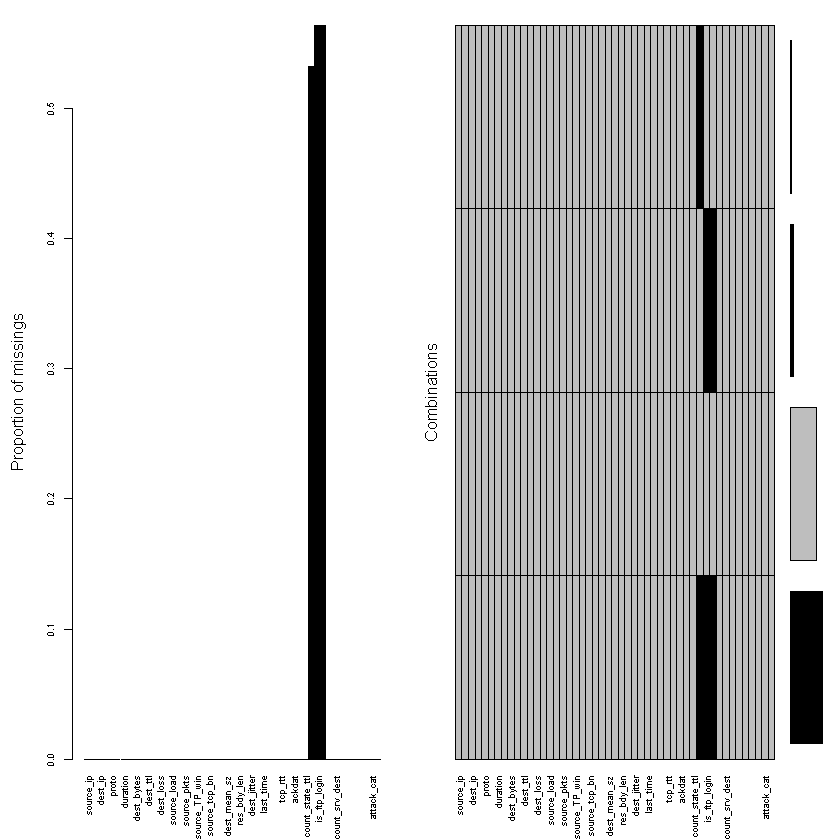

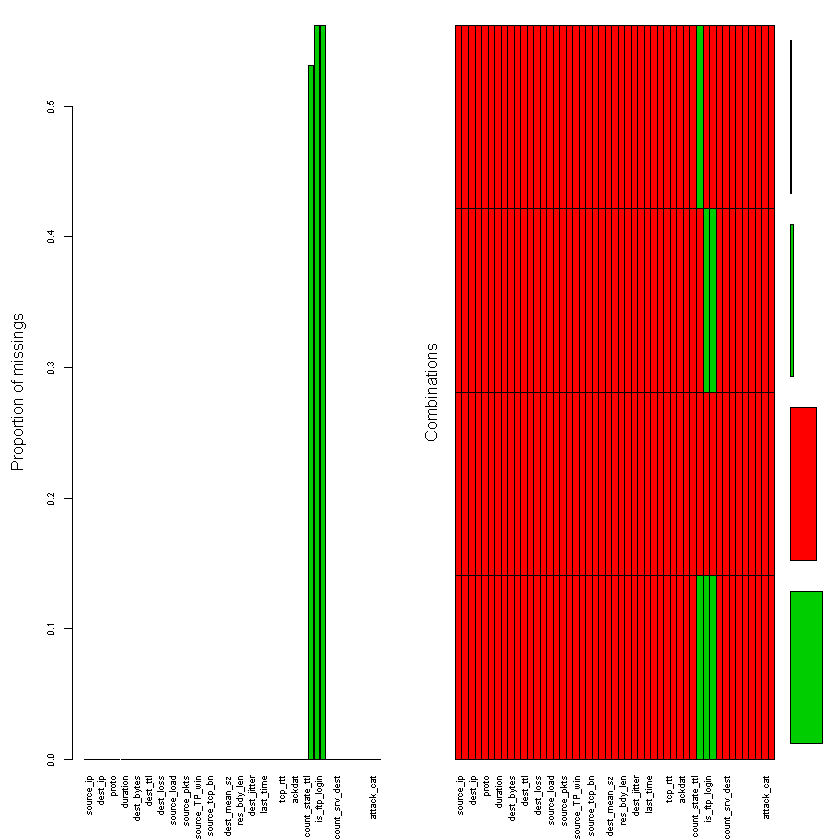

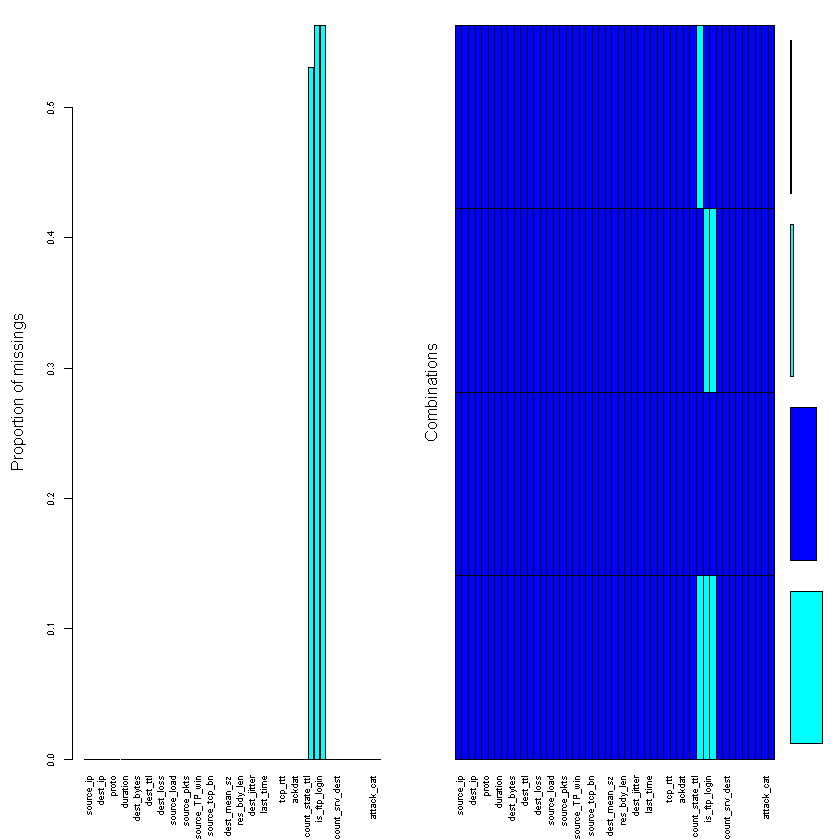

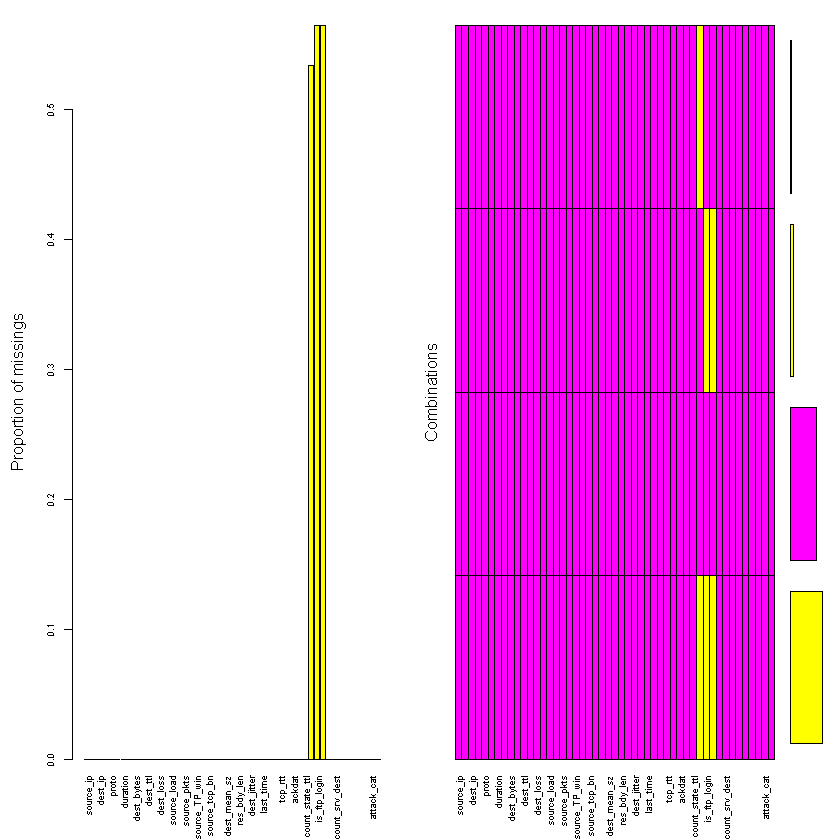

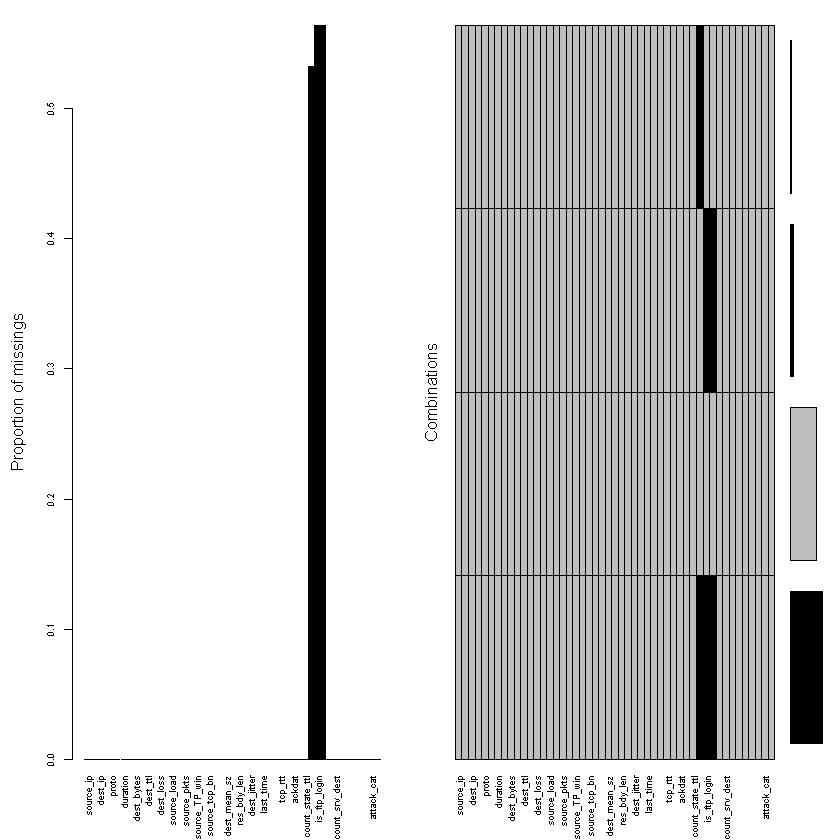

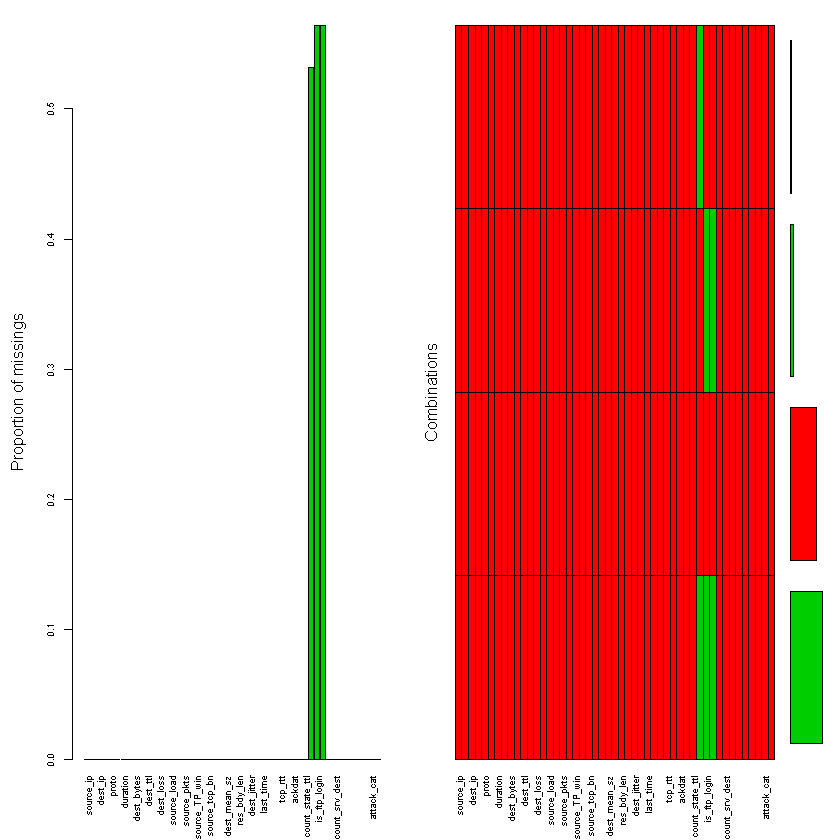

In [15]:
op <- par(mfrow = c(3,3))
for(i in 1:9) {
	set.seed(i)
	some <- sample(1:nrow(df), round(nrow(df)*0.05))
	df_t <- df[some, ]
	aggr(df_t, col = c(2*i,2*i+1))
	}
par(op)

In [16]:
## Lots of the missingness is spread across 3 main features
table(df$is_ftp_login)
identical(sum(table(df$is_ftp_login)), nrow(df)) # Should be TRUE, but it is FALSE
	## More than half of the data is missing in that 
    ## This missingness does NOT count towards the total amount of datapoints => 'spooky' missingness


      0       1       2       4 
1066592   43389      30     156 

[1] FALSE

In [17]:
## Let's check the same result for the whole feature space
## Check if all missingness in the data is 'spooky'
idt <- vector(len = ncol(df))
for(i in 1:ncol(df)) {
	idt[i]<- identical(sum(table(df[,i])), nrow(df))
		}
idt

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[37]  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[49]  TRUE

In [18]:
p<- paste("The number of anomalous features is", ncol(df)-sum(idt), sep=" ")
print(p)

[1] "The number of anomalous features is 3"


In [19]:
## Using the missingness visualisation, we deduce a strong correlation between the
## missingness of the three features, and can also identify them as:

df_miss <- cbind(df$is_ftp_login, df$count_ftp_cmd, df$count_flw_http_mthd)
colnames(df_miss) <- c("login", "cmd", "http")
df_miss <- as.data.frame(df_miss)
head(df_miss, 20) # Still too large to work with, easy trick:
table(df_miss$login)
table(df_miss$cmd)
table(df_miss$http)

login,cmd,http
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0



      0       1       2       4 
1066592   43389      30     156 


      0       1       2       3       4       5       6       8 
1066497   40077    1264     729     960     290     332      18 


     0      1      2      3      4      5      6      8      9     10     12 
986790 188008    588    738   6564    430   7902     56    270     30    132 
    14     16     25     30     36 
   224     48     25     60     36 

In [20]:
df_miss_2 <- df_miss[df_miss$login!=0 & df_miss$login!=1, ]
dim(df_miss_2) # Checks out
head(df_miss_2, 15)
    ## We found the root of the problem. Weirdly enough, the lines themselves are listed across as
	## NA.1, NA.2 etc. - which is why table() failed to pick them up.


[1] 1430065       3

,login,cmd,http
NA,NA,NA,NA
NA.1,NA,NA,NA
NA.2,NA,NA,NA
NA.3,NA,NA,NA
NA.4,NA,NA,NA
NA.5,NA,NA,NA
NA.6,NA,NA,NA
NA.7,NA,NA,NA
NA.8,NA,NA,NA
NA.9,NA,NA,NA


In [21]:
l1 <- median(df_miss$login, na.rm = TRUE)
l2 <- median(df_miss$cmd, na.rm = TRUE)
l3 <- median(df_miss$http, na.rm = TRUE)
c(l1,l2,l3) # All 0

[1] 0 0 0

In [22]:
###### FAILED REPLACEMENT ATTEMPT
r1<- replace_na(data = df_miss$login, replace = l1)
r2<- replace_na(data = df_miss$cmd, replace = l2)
r3<- replace_na(data = df_miss$http, replace = l3)

l<- 3*nrow(df_miss) - (sum(table(df_miss$login))+sum(table(df_miss$cmd))+sum(table(df_miss$http)))
ll<- as.list(rep(0, times = l))
dd <- replace_na(data = df_miss, replace = ll)
###### END OF FAILED REPLACEMENT ATTEMPT

In [23]:
table(dd$login)
    ## NAs aren't picked up properly (?)


      0       1       2       4 
1066592   43389      30     156 

In [24]:
## GOOD attempt
df[is.na(df$is_ftp_login),] <- l1
df[is.na(df$count_ftp_cmd),] <- l2
df[is.na(df$count_flw_http_mthd),] <- l3

In [25]:
## Let's check if it worked
for(i in 1:ncol(df)) {
	idt[i]<- identical(sum(table(df[,i])), nrow(df))
		}
p<- paste("The number of anomalous features is", ncol(df)-sum(idt), sep=" ")
print(p)

[1] "The number of anomalous features is 0"


In [26]:
table(df$is_ftp_login)


      0       1 
2519436   20610 